In [1]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

In [6]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np

import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from datasets import load_dataset

dataset = load_dataset("haipradana/indonesian-twitter-hate-speech-cleaned")

print(dataset)
print(dataset["train"][0]) 


/home/vincent/skripsi_code/dl-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 12703
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2723
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2722
    })
})
{'text': 'di dalam kristen tdk semuanya diatur dlm bible, itulah sebabnya manusia diciptakan dgn akal dan pikiran untuk membedakan mna yg baik dan buruk mna yg patut dan tdk patut, tdk tertulis dlm bible bukan berarti boleh dil', 'label': 'neutral'}


In [ ]:
from datasets import concatenate_datasets

full_dataset = concatenate_datasets([
    dataset["train"],
    dataset["validation"],
    dataset["test"]
])

df = full_dataset.to_pandas()

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(df.shape)
print(df.head())

(18148, 2)
                                                text    label
0  tai lu semua yg bikin meme kayak gitu. lo tau ...     hate
1  INTINYA saya mencintai apa yang saya cintai da...  neutral
2  Selamat Hari Koperasi Nasional, Koperasi sebag...  neutral
3                              Terus Ganyang PKi URL     hate
4          Yang kritis ditangkapin Negara Sinting...     hate


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/vincent/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vincent/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/vincent/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

stop_words = set(stopwords.words('indonesian'))

negations = {"tidak", "bukan", "jangan", "tak", "nggak", "gak", "ga"}
stop_words = stop_words - negations

custom_add = {
    "yg", "aja", "dong", "nih", "sih", "banget", "bgt",
    "rt", "amp", "url", "hehe", "wkwk", "wk", "haha",
    "pls", "tolong", "kalo", "kl", "gitu", "kayak", "dong"
}

stop_words = stop_words | custom_add

stop_words_stemmed = {stemmer.stem(w) for w in stop_words}

def clean_text(text: str) -> str:
    # 1) Lowercase
    text = text.lower()
    # 2) Hapus URL, mention, hashtag
    text = re.sub(r'http\S+|www\S+', ' ', text)
    text = re.sub(r'@\w+', ' ', text)
    text = re.sub(r'#\w+', ' ', text)
    # 3) Hapus angka & tanda baca
    text = re.sub(r'\d+', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 4) Rapikan spasi
    text = re.sub(r'\s+', ' ', text).strip()
    # 5) Tokenisasi
    tokens = word_tokenize(text)
    # 6) Stemming
    tokens = [stemmer.stem(w) for w in tokens]
    # 7) Stopword removal
    tokens = [w for w in tokens if w not in stop_words_stemmed]
    # 8) Gabungkan
    return " ".join(tokens)

print(clean_text(df['text'][0])) 

tai lu bikin meme lo tau gak exhausted cape iya gua rasain mati bego pelihara sampah


In [ ]:
X_text = df['text'].apply(clean_text)
y = df['label']

In [ ]:
pd.set_option('display.max_colwidth', None)
display(X_text.head(10))     

0                                      tai lu bikin meme lo tau gak exhausted cape iya gua rasain mati bego pelihara sampah
1                         inti cinta cinta cinta gak peduli cewe cowo straight gay lesbian transgender whatever who you are
2             selamat koperasi nasional koperasi landas ekonomi bangsa dipeluhara tumbuh kembang ancam praktek kartel asing
3                                                                                                               ganyang pki
4                                                                                         kritis ditangkapin negara sinting
5                                                   abis liat peyeum bapake hendy cinta pegang peyeum peyeumpuan yah hahaha
6                                                      pilih anggota dpr konstituante partai menang milu pni masyumi nu pki
7                                                                      pilih jokowi susah susah teman percaya jokowi dr sby
8       

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# --- CountVectorizer ---
count_vectorizer = CountVectorizer(max_features=2000, dtype=np.float32)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [45]:
# --- TF-IDF ---
tfidf_vectorizer = TfidfVectorizer(max_features=2000, dtype=np.float32)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [35]:
from sklearn.pipeline import Pipeline, make_pipeline

[LightGBM] [Info] Number of positive: 7143, number of negative: 7375
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4217
[LightGBM] [Info] Number of data points in the train set: 14518, number of used features: 1328
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
== BoW + LightGBM ==
              precision    recall  f1-score   support

        hate     0.8238    0.7984    0.8109      1850
     neutral     0.7970    0.8225    0.8095      1780

    accuracy                         0.8102      3630
   macro avg     0.8104    0.8104    0.8102      3630
weighted avg     0.8106    0.8102    0.8102      3630

F1-macro: 0.8101904030673466


/home/vincent/skripsi_code/dl-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


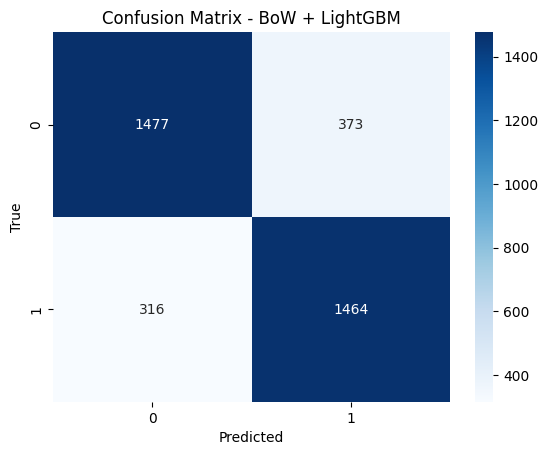

[LightGBM] [Info] Number of positive: 7143, number of negative: 7375
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31605
[LightGBM] [Info] Number of data points in the train set: 14518, number of used features: 1328
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/home/vincent/skripsi_code/dl-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


== TF-IDF + LightGBM ==
              precision    recall  f1-score   support

        hate     0.8169    0.7908    0.8036      1850
     neutral     0.7896    0.8157    0.8024      1780

    accuracy                         0.8030      3630
   macro avg     0.8032    0.8033    0.8030      3630
weighted avg     0.8035    0.8030    0.8030      3630

F1-macro: 0.8030284942928769


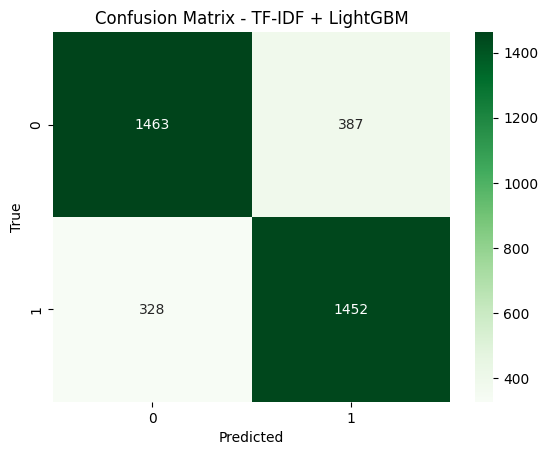

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

clf_bow = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    class_weight='balanced'
)

pipe_bow = make_pipeline(count_vectorizer, clf_bow)

pipe_bow.fit(X_train, y_train)

pred_bow = pipe_bow.predict(X_test)
print("== BoW + LightGBM ==")
print(classification_report(y_test, pred_bow, digits=4))
print("F1-macro:", f1_score(y_test, pred_bow, average='macro'))

# Confusion matrix
cm = confusion_matrix(y_test, pred_bow)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - BoW + LightGBM")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()

# --- TF-IDF ---
clf_tfidf = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    class_weight='balanced'
)
pipe_tfidf = make_pipeline(tfidf_vectorizer, clf_tfidf)
pipe_tfidf.fit(X_train, y_train)

pred_tfidf = pipe_tfidf.predict(X_test)

print("== TF-IDF + LightGBM ==")
print(classification_report(y_test, pred_tfidf, digits=4))
print("F1-macro:", f1_score(y_test, pred_tfidf, average='macro'))

cm = confusion_matrix(y_test, pred_tfidf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - TF-IDF + LightGBM")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()


In [37]:
from sklearn.pipeline import make_pipeline
import joblib

pipe_bow = make_pipeline(count_vectorizer, clf_bow)
pipe_tfidf = make_pipeline(tfidf_vectorizer, clf_tfidf)

joblib.dump(pipe_bow, "pipeline_bow_lgbm_7030.joblib")
joblib.dump(pipe_tfidf, "pipeline_tfidf_lgbm_7030.joblib")


['pipeline_tfidf_lgbm_7030.joblib']

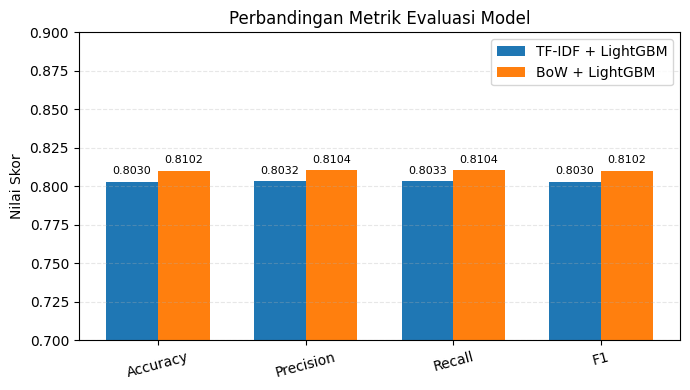

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

acc_tfidf   = 0.8030
prec_tfidf  = 0.8032   
rec_tfidf   = 0.8033   
f1_tfidf    = 0.8030   

acc_bow     = 0.8102
prec_bow    = 0.8104
rec_bow     = 0.8104
f1_bow      = 0.8102

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
tfidf_scores = [acc_tfidf, prec_tfidf, rec_tfidf, f1_tfidf]
bow_scores   = [acc_bow,   prec_bow,   rec_bow,   f1_bow]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(7,4))
plt.bar(x - width/2, tfidf_scores, width, label='TF-IDF + LightGBM')
plt.bar(x + width/2, bow_scores,   width, label='BoW + LightGBM')

plt.ylim(0.7, 0.9)
plt.ylabel('Nilai Skor')
plt.xticks(x, metrics, rotation=15)
plt.title('Perbandingan Metrik Evaluasi Model')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

for i, v in enumerate(tfidf_scores):
    plt.text(x[i]-width/2, v+0.005, f'{v:.4f}', ha='center', fontsize=8)
for i, v in enumerate(bow_scores):
    plt.text(x[i]+width/2, v+0.005, f'{v:.4f}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()
